<a href="https://colab.research.google.com/github/anoodleReza/Regression-for-University-Admission-/blob/main/Machine_Learning_Group_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
#**SETUP**


In [ ]:
#Setting Up collab folder
! pip install kaggle
! mkdir ~/.kaggle
from google.colab import drive
drive.mount('/content/drive')
#Setting kaggle credentials
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
#Download Dataset
! kaggle datasets download -d akshaydattatraykhare/data-for-admission-in-the-university
! unzip data-for-admission-in-the-university.zip -d data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  0% 0.00/4.29k [00:00<?, ?B/s]
100% 4.29k/4.29k [00:00<00:00, 4.68MB/s]
Archive:  data-for-admission-in-the-university.zip
  inflating: data/adm_data.csv       


In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = '/content/data/adm_data.csv'
df = pd.read_csv(dataset)

In [ ]:
pd.set_option('display.max_columns', None)
df = df.iloc[:,1:]

In [ ]:
df.rename(columns={'Chance of Admit ': 'Chance'}, inplace=True)
df.rename(columns={'GRE Score': 'GRE'}, inplace=True)
df.rename(columns={'TOEFL Score': 'TOEFL'}, inplace=True)
df.rename(columns={'University Rating': 'Rating'}, inplace=True)
df.rename(columns={'LOR ': 'LOR'}, inplace=True)



---


# **STATISTICAL METHODS**

In [ ]:
df.mean()

GRE         316.807500
TOEFL       107.410000
Rating        3.087500
SOP           3.400000
LOR           3.452500
CGPA          8.598925
Research      0.547500
Chance        0.724350
dtype: float64

In [ ]:
df.median()

GRE         317.00
TOEFL       107.00
Rating        3.00
SOP           3.50
LOR           3.50
CGPA          8.61
Research      1.00
Chance        0.73
dtype: float64

In [ ]:
df.std()

GRE         11.473646
TOEFL        6.069514
Rating       1.143728
SOP          1.006869
LOR          0.898478
CGPA         0.596317
Research     0.498362
Chance       0.142609
dtype: float64

In [ ]:
X = 'Chance'

#Looking for outliers using the Tukey's Fences method
q1 = df[X].quantile(0.25)
q3 = df[X].quantile(0.75)
iqr = q3 - q1
iso = (df[[X]] < q1 - 1.5*iqr) | (df[[X]] > q3 + 1.5*iqr)
iseo = (df[[X]] < q1 - 3*iqr) | (df[[X]] > q3 + 3*iqr)
df1 = df[[X]].assign(is_outlier=iso, is_extreme_outlier=iseo)
df1.loc[df1['is_outlier'] | df1['is_extreme_outlier']]

,Chance,is_outlier,is_extreme_outlier
92,0.34,True,False
376,0.34,True,False


In [ ]:
X = 'TOEFL'

#Looking for outliers using the Tukey's Fences method
q1 = df[X].quantile(0.25)
q3 = df[X].quantile(0.75)
iqr = q3 - q1
iso = (df[[X]] < q1 - 1.5*iqr) | (df[[X]] > q3 + 1.5*iqr)
iseo = (df[[X]] < q1 - 3*iqr) | (df[[X]] > q3 + 3*iqr)
df1 = df[[X]].assign(is_outlier=iso, is_extreme_outlier=iseo)
df1.loc[df1['is_outlier'] | df1['is_extreme_outlier']]

,TOEFL,is_outlier,is_extreme_outlier


In [ ]:
X = 'Rating'

#Looking for outliers using the Tukey's Fences method
q1 = df[X].quantile(0.25)
q3 = df[X].quantile(0.75)
iqr = q3 - q1
iso = (df[[X]] < q1 - 1.5*iqr) | (df[[X]] > q3 + 1.5*iqr)
iseo = (df[[X]] < q1 - 3*iqr) | (df[[X]] > q3 + 3*iqr)
df1 = df[[X]].assign(is_outlier=iso, is_extreme_outlier=iseo)
df1.loc[df1['is_outlier'] | df1['is_extreme_outlier']]

,Rating,is_outlier,is_extreme_outlier


In [ ]:
X = 'SOP'

#Looking for outliers using the Tukey's Fences method
q1 = df[X].quantile(0.25)
q3 = df[X].quantile(0.75)
iqr = q3 - q1
iso = (df[[X]] < q1 - 1.5*iqr) | (df[[X]] > q3 + 1.5*iqr)
iseo = (df[[X]] < q1 - 3*iqr) | (df[[X]] > q3 + 3*iqr)
df1 = df[[X]].assign(is_outlier=iso, is_extreme_outlier=iseo)
df1.loc[df1['is_outlier'] | df1['is_extreme_outlier']]

,SOP,is_outlier,is_extreme_outlier


In [ ]:
X = 'LOR'

#Looking for outliers using the Tukey's Fences method
q1 = df[X].quantile(0.25)
q3 = df[X].quantile(0.75)
iqr = q3 - q1
iso = (df[[X]] < q1 - 1.5*iqr) | (df[[X]] > q3 + 1.5*iqr)
iseo = (df[[X]] < q1 - 3*iqr) | (df[[X]] > q3 + 3*iqr)
df1 = df[[X]].assign(is_outlier=iso, is_extreme_outlier=iseo)
df1.loc[df1['is_outlier'] | df1['is_extreme_outlier']]

,LOR,is_outlier,is_extreme_outlier
347,1.0,True,False


In [ ]:
X = 'CGPA'

#Looking for outliers using the Tukey's Fences method
q1 = df[X].quantile(0.25)
q3 = df[X].quantile(0.75)
iqr = q3 - q1
iso = (df[[X]] < q1 - 1.5*iqr) | (df[[X]] > q3 + 1.5*iqr)
iseo = (df[[X]] < q1 - 3*iqr) | (df[[X]] > q3 + 3*iqr)
df1 = df[[X]].assign(is_outlier=iso, is_extreme_outlier=iseo)
df1.loc[df1['is_outlier'] | df1['is_extreme_outlier']]

,CGPA,is_outlier,is_extreme_outlier
58,6.8,True,False


In [ ]:
X = 'Research'

#Looking for outliers using the Tukey's Fences method
q1 = df[X].quantile(0.25)
q3 = df[X].quantile(0.75)
iqr = q3 - q1
iso = (df[[X]] < q1 - 1.5*iqr) | (df[[X]] > q3 + 1.5*iqr)
iseo = (df[[X]] < q1 - 3*iqr) | (df[[X]] > q3 + 3*iqr)
df1 = df[[X]].assign(is_outlier=iso, is_extreme_outlier=iseo)
df1.loc[df1['is_outlier'] | df1['is_extreme_outlier']]

,Research,is_outlier,is_extreme_outlier


In [ ]:
X = 'GRE'

#Looking for outliers using the Tukey's Fences method
q1 = df[X].quantile(0.25)
q3 = df[X].quantile(0.75)
iqr = q3 - q1
iso = (df[[X]] < q1 - 1.5*iqr) | (df[[X]] > q3 + 1.5*iqr)
iseo = (df[[X]] < q1 - 3*iqr) | (df[[X]] > q3 + 3*iqr)
df1 = df[[X]].assign(is_outlier=iso, is_extreme_outlier=iseo)
df1.loc[df1['is_outlier'] | df1['is_extreme_outlier']]

,GRE,is_outlier,is_extreme_outlier


In [ ]:
df.drop([92,58,376,347],axis=0,inplace=True)



---

#  **VISUALIZATION METHODS**

Text(0.5, 1.0, 'Distribution of Ratings')

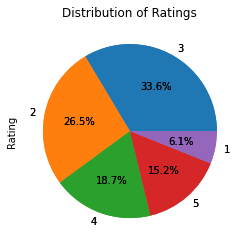

In [ ]:
ratings_counts = df['Rating'].value_counts()
ratings_counts.plot(kind='pie', autopct='%1.1f%%')
plot = ratings_counts.plot(kind='pie', autopct='%1.1f%%')
plot.set_title('Distribution of Ratings')

Text(0.5, 1.0, 'Distribution of LOR')

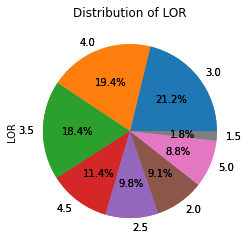

In [ ]:
df['LOR'] = df['LOR'].apply(lambda x: str(int(x)) if x == int(x) else str(x))
df['LOR'] = df['LOR'].astype(float)

lor_counts = df['LOR'].value_counts()
lor_counts.plot(kind='pie', autopct='%1.1f%%')
plot = lor_counts.plot(kind='pie', autopct='%1.1f%%')
plot.set_title('Distribution of LOR')

Text(0.5, 1.0, 'Distribution of SOP')

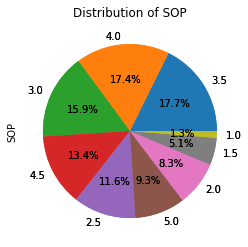

In [ ]:
SOP_counts = df['SOP'].value_counts()
SOP_counts.plot(kind='pie', autopct='%1.1f%%')
plot = SOP_counts.plot(kind='pie', autopct='%1.1f%%')
plot.set_title('Distribution of SOP')

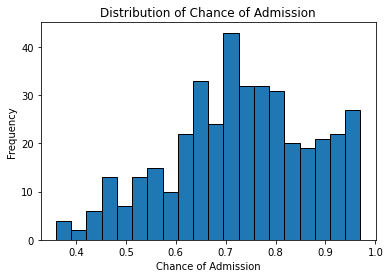

In [ ]:
plt.hist(df['Chance'], bins=20, edgecolor='black')
plt.xlabel('Chance of Admission')
plt.ylabel('Frequency')
plt.title('Distribution of Chance of Admission')
plt.show()

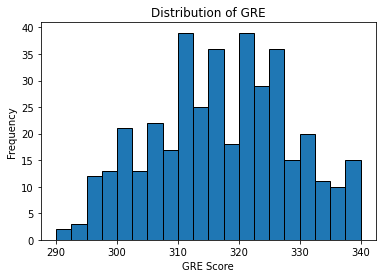

In [ ]:
plt.hist(df['GRE'], bins=20, edgecolor='black')
plt.xlabel('GRE Score')
plt.ylabel('Frequency')
plt.title('Distribution of GRE')
plt.show()

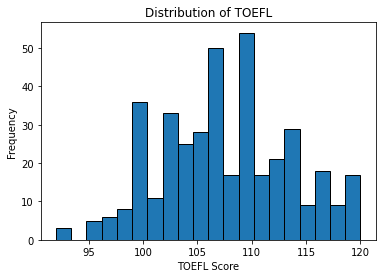

In [ ]:
plt.hist(df['TOEFL'], bins=20, edgecolor='black')
plt.xlabel('TOEFL Score')
plt.ylabel('Frequency')
plt.title('Distribution of TOEFL')
plt.show()

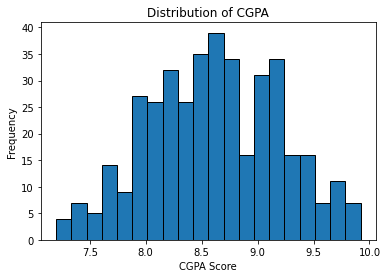

In [ ]:
plt.hist(df['CGPA'], bins=20, edgecolor='black')
plt.xlabel('CGPA Score')
plt.ylabel('Frequency')
plt.title('Distribution of CGPA')
plt.show()

<Axes: >

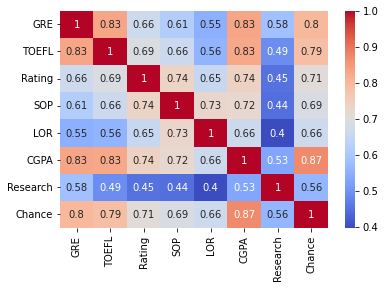

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

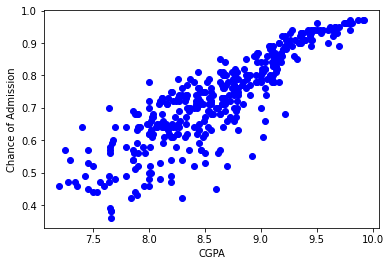

In [ ]:
plt.scatter(df.CGPA, df.Chance, color='blue')
plt.xlabel("CGPA")
plt.ylabel("Chance of Admission")
plt.show()

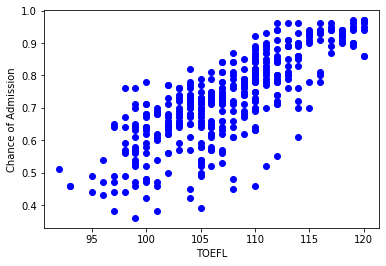

In [ ]:
plt.scatter(df.TOEFL, df.Chance, color='blue')
plt.xlabel("TOEFL")
plt.ylabel("Chance of Admission")
plt.show()

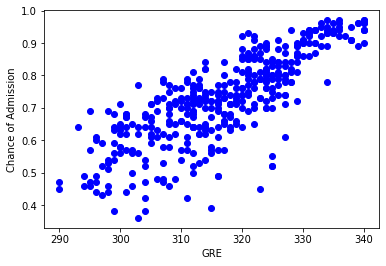

In [ ]:
plt.scatter(df.GRE, df.Chance, color='blue')
plt.xlabel("GRE")
plt.ylabel("Chance of Admission")
plt.show()



---


# **DATA PREPARATION**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# recall the variable names
df.head()

,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data = pd.DataFrame({'CGPA': df['CGPA'], 'Chance': df['Chance'], 'GRE':df['GRE'], 'TOEFL': df['TOEFL']})
train, test = train_test_split(data, test_size=0.2, random_state=42)
validation, test = train_test_split(test, test_size=0.5, random_state=42)

In [ ]:
x_train = train[['CGPA','TOEFL','GRE']]
y_train = train['Chance']
x_val = validation[['CGPA','TOEFL','GRE']]
y_val = validation['Chance']
x_test = test[['CGPA','TOEFL','GRE']]
y_test = test['Chance']





---



# **LINEAR REGRESSION STEPS**

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(np.asanyarray(train[['CGPA']]), np.asanyarray(train[['Chance']]))
# The coefficients
print ('Coefficients: ', lin_reg.coef_)
print ('Intercept: ',lin_reg.intercept_)

Coefficients:  [[0.20355449]]
Intercept:  [-1.02083759]


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the input features
train_x = np.asanyarray(train[['CGPA','TOEFL','GRE']])
train_y = np.asanyarray(train[['Chance']])

scalerx = StandardScaler()
X_train_scaled = scalerx.fit_transform(train_x)
scalery = StandardScaler()
Y_train_scaled = scalery.fit_transform(train_y)



---


# **MULTIPLE LINEAR REGRESSION STEPS**

In [ ]:
mlinreg = LinearRegression()

In [ ]:
mlinreg.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', mlinreg.coef_)
print ('Intercept: ',mlinreg.intercept_)

Coefficients:  [[0.151157   0.00274577 0.00180533]]
Intercept:  [-1.43809813]


In [ ]:
#Plot Linear Model



---


# **TUNING HYPERPARAMETERS(GridSearchCV)**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'copy_X': [True, False]
}

In [ ]:
# Create an instance of the GridSearchCV class
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5)

# Fit the model to the validation data
grid_search.fit(x_val, y_val)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]})

In [ ]:
# Print the best hyperparameters and the corresponding R-squared value
print(grid_search.best_params_)
print(grid_search.best_score_)

{'copy_X': True, 'fit_intercept': True, 'positive': True}
0.7718383474748781




---


# **EVALUATION**

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
finreg = LinearRegression(copy_X=True, fit_intercept=True, positive=True)

# Fit the model to the Training data
finreg.fit(x_train, y_train)

# Make predictions on the Testing data
y_pred = finreg.predict(x_test)

# Evaluate the performance of the model
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the R-squared value and mean squared error
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print('Mean squared error:', mse)
print('R-squared:', r2)


Mean absolute error: 0.05
Mean squared error: 0.0059553830114892434
R-squared: 0.7771272403170074




---


# **TUING HYPERPARAMERS 2**

In [ ]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from time import time
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [ ]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(x_val, y_val)
    train_time = time() - start
    start = time()
    y_pred = model.predict(x_test)
    predict_time = time()-start
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.008s
	Prediction time: 0.006s
	Explained variance: 0.6022754575053327
	Mean absolute error: 0.07995
	R2 score: 0.5989334231503312

GradientBoostingRegressor()
	Training time: 0.082s
	Prediction time: 0.002s
	Explained variance: 0.6875585077244668
	Mean absolute error: 0.07079275022725624
	R2 score: 0.652661829220794

KNeighborsRegressor()
	Training time: 0.003s
	Prediction time: 0.003s
	Explained variance: 0.6022754575053327
	Mean absolute error: 0.07995
	R2 score: 0.5989334231503312

ExtraTreesRegressor()
	Training time: 0.201s
	Prediction time: 0.020s
	Explained variance: 0.7191702034448563
	Mean absolute error: 0.06879749999999993
	R2 score: 0.6873758560682612

RandomForestRegressor()
	Training time: 0.252s
	Prediction time: 0.019s
	Explained variance: 0.7088511928820035
	Mean absolute error: 0.0691299999999999
	R2 score: 0.6789106507989978

DecisionTreeRegressor()
	Training time: 0.005s
	Prediction time: 0.002s
	Explained variance: 0.60039856